In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import scipy
from scipy import stats

def pltDefault(ax):
    ax.axes.set_aspect('equal')
    pltCenterAxis(ax)

def pltCenterAxis(ax):
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

def makeFig12_5():
    circle1 = plt.Circle((0, 0), 1.0, fill=False)
    rectangle1 = plt.Rectangle((-1, -1), 2,2, fill=False)

    fig, ax = plt.subplots()
    pltDefault(ax)
    ax.set(xlim=(-2,2), ylim=(-2,2))

    ax.add_artist(circle1)
    ax.add_artist(rectangle1)
    
    return fig, ax

# 12.2
Reproduce Figure 12.2a by letting $X \sim U(-1 ,1)$ and $Y \sim U(-1,1)$, where X and Yare independent.
Omit any realizations of $(X, Y)$ for which $\sqrt{X^2 + Y^2} > 1$.
Explain why this produces a uniform distribution of points in the unit circle.
See also Problem 13.23 for a more formal justification of this procedure.

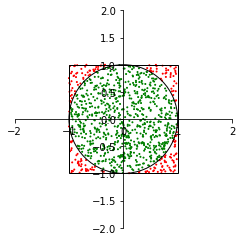

In [2]:
import math
S = 1000

# generate points in a uniform distribution
X = np.random.uniform(-1,math.sqrt(1),S)
Y = np.random.uniform(-1,math.sqrt(1),S)
color = ['red' if (math.sqrt(x**2+y**2) > 1) else 'green' for x, y in zip(X, Y)]

# we depend on the function below being defined...
fig, ax = makeFig12_5()
ax.scatter(X, Y, s=1, color=color)

As it has a uniform distribution, then we have the same opportunity to place a point in either place of the circle.
When we then put in the limits, then we basically have the equation for the circle, therefore we get the above.

## 12.5
In this problem we estimate $\pi$ using probability arguments.
Let $X \sim U(-1,1)$ and $Y \sim U(-1,1)$ for X and Y independent.
First relate $P[X^2+Y^2 \leq 1]$ to the value of $\pi$.
Then generate realizations of X and Y and use them to estimate $\pi$.

$\sim$ means distributed, U means that it is uniform, which they are distributed uniformly ($U(a,b)$), meaning that each point is equally likely (unlike gaussing/normal distribution)

From the limits given by $P[X^2+Y^2 \leq 1]$, we have the unit circle, and from our uniform distribution, we form a square.
We can therefore see, that the probability that any value for P, will be inside of the bounds of (-1, 1) (our square).
This can be shown below

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2edc915850>)

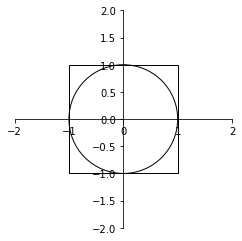

In [3]:

makeFig12_5()

From that we get, that tho probability for single point to land in each of the 4 quadrant of the square is $\frac{1}{4}$, whereas the probibily to land in the square is 1.
This can be seen in the table below.

| Area | Probability |
|:-----|-------|
| 4 | 1 |
| 2 | $\frac{1}{2}$ |
| 1 | $\frac{1}{4}$ |

The area of the circle is given as $A_c = \pi \cdot r^2$, and the area for the square as $A_s = (2r)^2 = 4r^2$.

Therefore the probability that single point is placed in the circle, is given as $P=\frac{A_c}{A_s} = \frac{\pi}{4}$.
This can be used to estimate $\pi$, if we rewrite it to.

$$
4 \cdot P = \pi
$$

Therefore, if we run a [monte carlo simulation](https://en.wikipedia.org/wiki/Monte_Carlo_method#Mersenne_twister_(MT19937)_in_Python_(a_Monte_Carlo_method_simulation)), we can use that knowledge to estimate the value of $\pi$.


3.14164

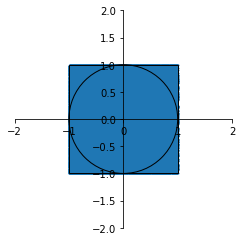

In [18]:
# number of points to generate
S = 100000

# generate points in a uniform distribution
X = np.random.uniform(-1,math.sqrt(1),S)
Y = np.random.uniform(-1,math.sqrt(1),S)

fig, ax = makeFig12_5()
ax.scatter(X, Y, s=1)

# points inside the circle
inCircle = ((X**2+Y**2)<=1).sum()

# calculate the actual percentage of points in circle (probability)
# and multiply it by 4
# 4*(1/S)*inCircle -> rewritten as
4*(inCircle/S)

When generating the points, we use PDF (probability density function).
The CDF (cumulative density function), cannot be used for this, as it gives us the sum probability of the probability at a given X value (should reach 1), whereas PDF is the probability at a specific X value.
See notes for examples.


# 12.11
If $(X, Y)$ has a standard bivariate Gaussian PDF, find $P[X^2 + Y^2 = 10]$.

TODO(eyJhb) insert note about a bivarite Gaussian PDF is a 3d graph bell-curve pointing out (positive). 3d because bivariate, bell curve because of the gaussian distribution (PDF).

Bivariate means that we have two R.V. X and Y, while a univariate would mean we have a single R.V.
The definition for a univariate is given as

$$
P[a \leq X \leq b] = \int_a^b f_X(x) dx
$$

Which in our case with no inequality means that we can rewrite it as $P[10 \leq X^2 + Y^2 \leq 10]$, which means we will integrate from a to a, which will give us zero.

$$
P[a \leq X \leq a] = \int_a^a f_X(x) dx = 0
$$

If the example instead was $P[9 \leq X^2 + Y^2 \leq 10]$, then we would be able to calculate it, but however in this case the answer is 0.

# 12.15
If we have the following

$$
P_{X,Y}(x,y) = \left\{ \begin{matrix}
2 & \; 0 < x < 1 ,\; 0 < y < x \\
0 & \; \text{otherwise}
\end{matrix} \right.
$$

find the marginal PDFs.

This can be done by using

$$
\begin{align}
P_X(x) = \int_c^d f(x,y) dy \\
P_Y(y) = \int_a^b f(x,y) dx \\
\text{where} \; x \in [a,b], \; y \in [c,d]
\end{align}
$$

Firstly we can rewrite our ranges, in the form to support x and y.
This means that if you draw a line `0----y----x----1`, then for x we can see that $y < x < 1$, while for y $0 < y < x$.
It can be hard to grasp in the begining, but try to think of it that way. 
I have tried to illustrate the inequality in the plot below, but not sure it is correct, therefore the line might work better.
TODO(eyJhb) check if inequality graph is correct.

We can then calculate it as.

$$
P_X(x) = \int_0^x 2 dy = \left[ 2y \right]_0^x = 2x - 2 \cdot 0 = 2x , \; for \; 0 < x < 1 \\
$$

$$
P_Y(y) = \int_y^1 2 dx = \left[ 2x \right]_y^1 = 2 \cdot 1 - 2y = 2 - 2y , \; for \; 0 < y < x \; \text{read note} \\
$$

NOTE: The book says $ 0 < y < 1$, which I guess is correct at some point, but seeing as y has to be strictly less than x, and x has to be strictly less than 1, then there is a infinity decimal where it is wrong (somewhat).

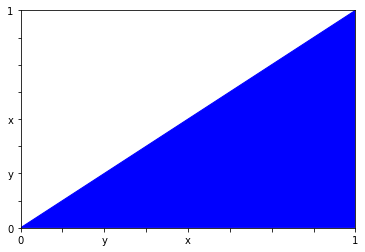

In [5]:
polygon2 = plt.Polygon([[0,0],[4,2],[4,0]], color= "blue")

fig, ax = plt.subplots()
ax.set(xlim=(0,4), ylim=(0,2))
ax.set_yticklabels(["0", "", "y", "", "x", "", "", "", 1])
ax.set_xticklabels(["0", "", "y", "", "x", "", "", "", 1])

ax.add_artist(polygon2)



# 12.38
If X and Y have the joint PDF

$$
\left[ \begin{matrix} X \\ Y \end{matrix} \right]
\sim N \left(
\begin{bmatrix} 1 \\ 2 \end{bmatrix} ,
\begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix} 
\right)
$$

find the joint PDF of the transformed random vector

$$
\left[ \begin{matrix} W \\ Z \end{matrix} \right] =
\begin{bmatrix} 1 & 1 \\ 2 & 3 \end{bmatrix} 
\begin{bmatrix} X \\ Y \end{bmatrix}
$$

We can do this, by using the theorem 12.7.1 in the book (Linear transformation of Gaussian random variables) p. 409.
Page 410 denotes our matrix G, that we want to multiply with $[XY]^T$.

Which summaries says: if $[XY]^T \sim N(\mu,C)$, then $G[XY]^T \sim N(Gu, GCG^T)$

In [6]:
u = np.array([[1],[2]])
C = np.array([[2,-1],[-1,2]])
G = np.array([[1,1],[2,3]])


u_wz = G @ u
C_wz = G@C@G.T

u_wz, C_wz

(array([[3],
        [8]]),
 array([[ 2,  5],
        [ 5, 14]]))

# 13.2
Determine if the proposed conditional PDF

$$
P_{Y|X}(y|x) = \left\{ \begin{matrix}
ce^{-yx^{-1}} & \; y \geq 0, \; x > 0 \\
0 & \; \text{otherwise}
\end{matrix} \right.
$$

(rewrote $-y/x=-yx^{-1}$)

is a valid conditional PDF for some c. If so, find the required value of c.

For the requirements for it to be a valid PDF, please check notes.


As far as I can see, there is a little twist where x and y has been flipped around, so we will do it accordingly to y instead of x (TODO(eyJhb) verify this).
Normally you go from $-\infty$ to $\infty$, but we have from 0 to $\infty$, as y cannot be below or equal to 0.
We use Python to integrate this function.

In [7]:
from math import inf
import sympy

x = sympy.Symbol("x", positive=True)
y = sympy.Symbol("y", positive=True)
c = sympy.Symbol("c")
    
sympy.integrate(c*sympy.exp(-(y/x)), (y, 0, inf))

c*x

We set $cx=1$, as that is what it needs to be to be valid, therefore it is valid and the c value is given as $c=1/x$.
A little manual calculation below:

$$
\begin{align}
\int_0^{\infty} ce^{-yx^-1} dy = 1 \\
= c \int_0^{\infty} e^{-yx^-1} dy = 1 \\
= c \left[ -xe^{-yx^-1} \right]_0^{\infty} = 1 \\
= c (-xe^{-\infty x^-1} - -xe^{-0x^-1}) = 1 \\
= c (-xe^{-\infty x^-1} - -xe^{-0x^-1}) = 1 \\
= cx = 1 \\
= c = \frac{1}{x} \\
\end{align}
$$

And some Python, to ensure it was correct.

In [8]:
part1 = -x*sympy.exp(-inf*x**(-1))
part2 = -x*sympy.exp(-0*x**(-1))
sympy.simplify(sympy.Eq(c*(part1-part2),1))

Eq(c*x, 1)

# 13.4
If

$$
P_{Y|X}(y|x) = \left\{ \begin{matrix}
2e^{-(x+y)} & \; 0 \leq y \leq x, \; x \geq 0 \\
0 & \; \text{otherwise}
\end{matrix} \right.
$$

find $P_{Y|X}(y,y)$.

We can find this, by using the formulas from that is stated in the notes about joint, conditional and marginal PDF.
It is shows as below:

$$
P_{Y|X}(y|x) = \frac{P_{Y|X}(y|x)}{\int_{-\infty}^{\infty} P_{Y|X}(y|x) dy} \\
$$

Thus we can caculate our integral first

$$
\begin{align}
\int_{-\infty}^{\infty} P_{Y|X}(y|x) dy &= \int_{0}^{x} 2e^{-(x+y)} dy \\
&= 2 \int_{0}^{x} e^{-(x+y)} dy \\
&= 2 \left[ -e^{-(x+y)} \right]_{0}^{x} \\
&= 2 ( -e^{-(x+x)} - -e^{-(x+0)} ) \\
&= 2 ( -e^{-2x} + e^{-x} ) \\
\end{align}
$$

We then have the equation

$$
\begin{align}
P_{Y|X}(y|x) &= \frac{2e^{-(x+y)}}{2 ( -e^{-2x} + e^{-x})} \\
&= \frac{e^{-(x+y)}}{-e^{-2x} + e^{-x}} \\
&= \frac{e^{-y}}{-e^{-x} + 1} \\
&= \frac{e^{-y}}{1 - e^{-x}} \; \text{for} \; 0 \leq y \leq x, \; x \geq 0 \\
\end{align}
$$

In [9]:
x = sympy.Symbol("x")
y = sympy.Symbol("y")

exp = 2*sympy.exp(-(x+y))
    
inte = sympy.integrate(exp, (y, 0, x))
sympy.simplify(exp/inte)

exp(x - y)/(exp(x) - 1)

Sympy does not entirely agree with the facit from the book, but it should be true.

# 13.5
Plot the joint PDF

$$
P_{X|Y}(x|y) = \left\{ \begin{matrix}
2x & \; 0 \leq x \leq 1, \; 0 < y < 1 \\
0 & \; \text{otherwise}
\end{matrix} \right.
$$

Next determine by inspection the conditional PDF PYlx(ylx). Recall that the
conditional PDF is just the normalized cross-section of the joint PDF.


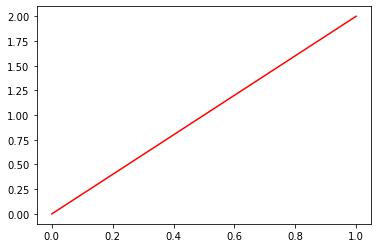

In [10]:
x = np.linspace(0,1,5)
y = 2*x
y1 = 0 < y
y2 = y < 1

fig, ax = plt.subplots()
ax.plot(x,y, 'r')

In [11]:
# can be calculated using the following
x, y = sympy.symbols("x y")
exp = 2*x
f_x = sympy.integrate(exp, (y, 0, 1))
f_y = sympy.integrate(exp, (x, 0, 1))

# look at notes for joint PDF
method1 = (exp*f_y)/f_x

# or like so
# look at notes for joint PDF
method2 = exp/sympy.integrate(exp, (y, 0, 1))

method1, method2

(1, 1)

So we can see, that that on the x-axis at 0.5, our $y=1$.

(OLD) (x/2), $y=1$, which is the value

# 13.8
If $X \sim U(0, 1)$ and $Y|(X = x) \sim U(0, x)$, find the joint PDF for X and Y and also the marginal PDF for Y.

We can rewrite this as the following:

$$
P_X(x) = \left\{ \begin{matrix}
\frac{1}{1 - 0} = 1 & \; 0 \leq x \leq 1 \\
0 & \; \text{otherwise}
\end{matrix} \right.
$$

Keep in mind, the range is given as $x \in [a, b]$, which means x should be from a (including) to b (including b), which is what we have written above.

For our conditional probability, we have $Y|(X=x)$, which means the probability that event Y happens, given that we have a realisation of X called x.
I am guessing this is because, we are depending on x as our $b$ value is our PDF for a uniform distribution, and therefore we are conditianal on it like so.

We can therefore rewrite it as such,

$$
P_{Y|X}(y|x) = \left\{ \begin{matrix}
\frac{1}{x} & \; 0 \leq x, \; 0 \leq y \leq x \\
0 & \; \text{otherwise}
\end{matrix} \right.
$$

The above range is shortened from $0 \leq x \leq x$ to what you see above.

Now we can find the joint probability of X and Y ($P_{X,Y}(x,y)$), by multiplying our two uniform distributions as X and probability of X, while Y is the probability of Y conditional of $X=x$.

$$
P_{X,Y}(x,y) = P_{(Y|X=x)} \cdot P_x
= \left\{ \begin{matrix}
\frac{1}{x} & \; 0 < x, \; 0 < y < x \\
0 & \; \text{otherwise}
\end{matrix} \right.
$$

While we can find the marginal PDF (see notes for this), by doing the following:

$$
p_Y(y) = \int_{-\infty}^\infty p_{Y|X}(y|x) p_X(x) dx
$$

We can find the ranges, by doing the same that we did in 12.15, by making a line and illustrating it like that.

- $0 < x < 1$
- $0 < y < x$
- $0 < y < x < 1$

Therefore our limits for x are $y < x < 1$.

$$
\begin{align}
p_Y(y) &= \int_y^1 p_{Y|X}(y|x) p_X(x) dx \\
&= \int_y^1 \frac{1}{x} dx 
= \left[ \log{x} \right]y^1 
= \log{0} - \log{y} 
= - \log{y}
\end{align}
$$


This gives us

$$
P_{X,Y}(x,y) = P_{(Y|X=x)} \cdot P_x
= \left\{ \begin{matrix}
\log{y} & \; 0 < y < 1 \\
0 & \; \text{otherwise}
\end{matrix} \right.
$$

In [12]:
x, y = sympy.symbols("x y")
exp = 1/x

sympy.integrate(exp, (x, y, 1))

-log(y)

## 13.16 (How does this one make sense?)
A resistor is chosen from a bin of 10 ohm resistors whose distribution satisfies $R \sim N(10, 0.25)$.
A $i = 1$ amp current source is applied to the resistor and the subsequent voltage V is measured with a voltmeter.
The voltmeter has an error E that is modeled as $E \sim N(0,1)$.
Find the probability that $V > 10$ volts if an 11 ohm resistor is chosen.
Note that $V = iR + E$.
What assumption do you need to make about the dependence between R and E?

- $R \sim N(10, 0.25)$
- $E \sim N(0,1)$
- $V = iR + E$

For this we have to assume, that they are independent.

The normal distributions are plotted below, so they can be shown.

From our problem, we get that we want to find the $P(V > 10 | R = 11)$.

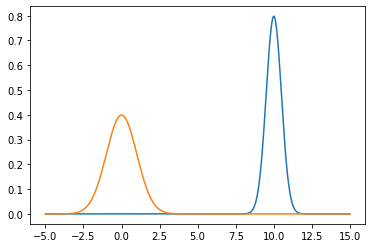

In [13]:
x = np.arange(-5, 15, step=0.01)

#R = np.random.normal(10, sp.sqrt(0.25), (2,4))
R = stats.norm(10, math.sqrt(0.25)).pdf(x)
E = stats.norm(0, math.sqrt(1)).pdf(x)

fig, ax = plt.subplots()
ax.plot(x,R)
ax.plot(x,E)


# 14.1 (Not done, but have the results, need confirmation)
If $Y=X_1+X_2+X_3$, where $X \sim N(\mu, C)$ and

$$
\begin{align}
\mu &= \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} \\
C &= \begin{bmatrix}
1 & 1/2 & 1/4 \\
1/2 & 1 & 1/2 \\
1/4 & 1/2 & 1 \\
\end{bmatrix} 
\end{align}
$$

find the mean and the variance of Y.

Reading materials for this is 14.2 and 14.10.

We need to look at the matrices like, they are the expecation for each x value, so expectation of $X_1$ is 1, for $X_2$ is 2, for $X_3$ is 3.

For the variance matrix, we have that it is the varance relatino between the two, so the first row is the variance between $X_1$ and the others, so first row is $Var(X_1, X_1),Var(X_1, X_2),Var(X_1, X_3)$, the next row is in regards to $X_2$.

Therefore the mean is equal to the sum of our vector $E[Y] = 6$, whereas on 

In [14]:
mu = np.array([1,2,3]).T
C = np.array([
    [1, 1/2, 1/4],
    [1/2, 1, 1/2],
    [1/4, 1/2, 1],
])

meanY = mu.sum()
varY = C.sum()
display(meanY, varY)

# apparantly from 14.10, this can be done
a = np.zeros(3)+1
varY = a.T @ C @ a


6

5.5

# 14.6
A large group of college students have weights that can be modeled as a $N(150, 30)$ random variable.
If 4 students are selected at random, what is the probability that they will all weigh more than 150 lbs?

We want the 

In [15]:
mu = 150
var = sp.sqrt(30)
lbs = 150
x = sp.symbols("x")

# pdf (not useful)
# expExp = -(1/2)*((x-mu)/var)**2
# exp = (1/(var*sp.sqrt(2*sp.pi))) * sp.exp(expExp)
# exp.subs({x: 150}).evalf()
# sp.exp(expExp).subs({x: 150})

# cdf

# error function as defined here:
# https://en.wikipedia.org/wiki/Error_function#Asymptotic_expansion
# we have a little wrapper, just to define a sympy symbol t, ignore the wrapper!
_erf = lambda z, t: (2/sp.sqrt(sp.pi))*sp.integrate(sp.exp(-t**2), (t, 0, z))
erf = lambda z: _erf(z, sp.symbols("t"))

# can also use sp.erf, which might be recommended
cdf = (1/2)*(1+erf((lbs-mu)/(var*sp.sqrt(2))))

# we do it to the power of 4, as we want the probability to do it 4
# times in a row
cdf**4

0.0625000000000000

In [16]:
mu = 150
var = sp.sqrt(30)

# doing it with scipy
cdf = scipy.stats.norm(loc = mu, scale=var**2).cdf(150)
cdf**4

0.0625

# 14.11 (Not entirely sure what they are asking for, I did something)
Simulate a single realization of a random vector composed of IID random variables with PDF $X_i \sim N(1, 2)$ for $i = 1,2, \dots ,N$.
Do this by repeating an experiment that successively generates $X \sim N(1, 2)$.
Then, find the outcome of the sample mean random variable and discuss what happens as N becomes large.

In [19]:
N = 100
mu = 1
sigma = 2

vector = np.zeros(N)
for i in range(N):
    # s = np.random.normal(mu, sigma, 1)
    # vector[i] = s[0]
    pdf = ( 1/(sigma * sp.sqrt(2*sp.pi)) ) * sp.exp( - (1/2) * ( (s[0] - mu)/sigma )**2 )
    vector[i] = pdf.evalf()
    
print(vector.sum()/len(vector))

NameError: name 's' is not defined

# 14.12 (what the hell do they even mean?)
An $N \times 1$ random vector X has $E_{X_i}[X_i] = \mu$ and $var(X_i) = i\sigma^2$ for $i = 1,2, \dots, N$.
The components of X are independent.
Does the sample mean random variable converge to $\mu$ as N becomes large?
Carry out a computer simulation for this problem and explain your results.

In [20]:
N = 10000

v = np.zeros(N)
for i in range(N):
    v[i] = i*sigma
    
display(v.sum()/len(v))

9999.0

# 14.19
Find the mean and variance of the random variable

$$
Y = \sum_{i=1}^{12} (U_i - \frac{1}{2})
$$

where $U_i \sim U(0, 1)$ and the $U_i$'s are IID.
Estimate the PDF of Y using a computer simulation and compare it to a standard Gaussian PDF.
See Section 15.5 for a theoretical justification of your results